[View in Colaboratory](https://colab.research.google.com/github/crdguez/mis_notebooks/blob/master/diagrams_gantt/matematicas_1cn_1819.ipynb)

# Programación de 1º de Bachillerato CCSS

In [0]:
#Solo hay que ejecutarlo una vez, te instala la librería gantt
!pip install https://files.pythonhosted.org/packages/20/03/61d9950a0b83386b668a300370e40a81b5c919afdc9b7c41d20bb9021215/python-gantt-0.6.0.tar.gz

    100% |████████████████████████████████| 61kB 149kB/s ta 0:00:01
  Running setup.py bdist_wheel for python-gantt ... done
  Stored in directory: /home/hp/.cache/pip/wheels/51/aa/02/672bca6debc072c12d8ee12ccd8bfb1cfa2af09ec8151121b9
Successfully built python-gantt


In [0]:
import pandas
pandas.__version__


'0.23.3'

https://docs.google.com/spreadsheets/d/15kpQ0uAfdrcyM2RFn9Rr3ZxDzgFJJjXMy2o7oED_Cl4/export?format=csv&gid=0


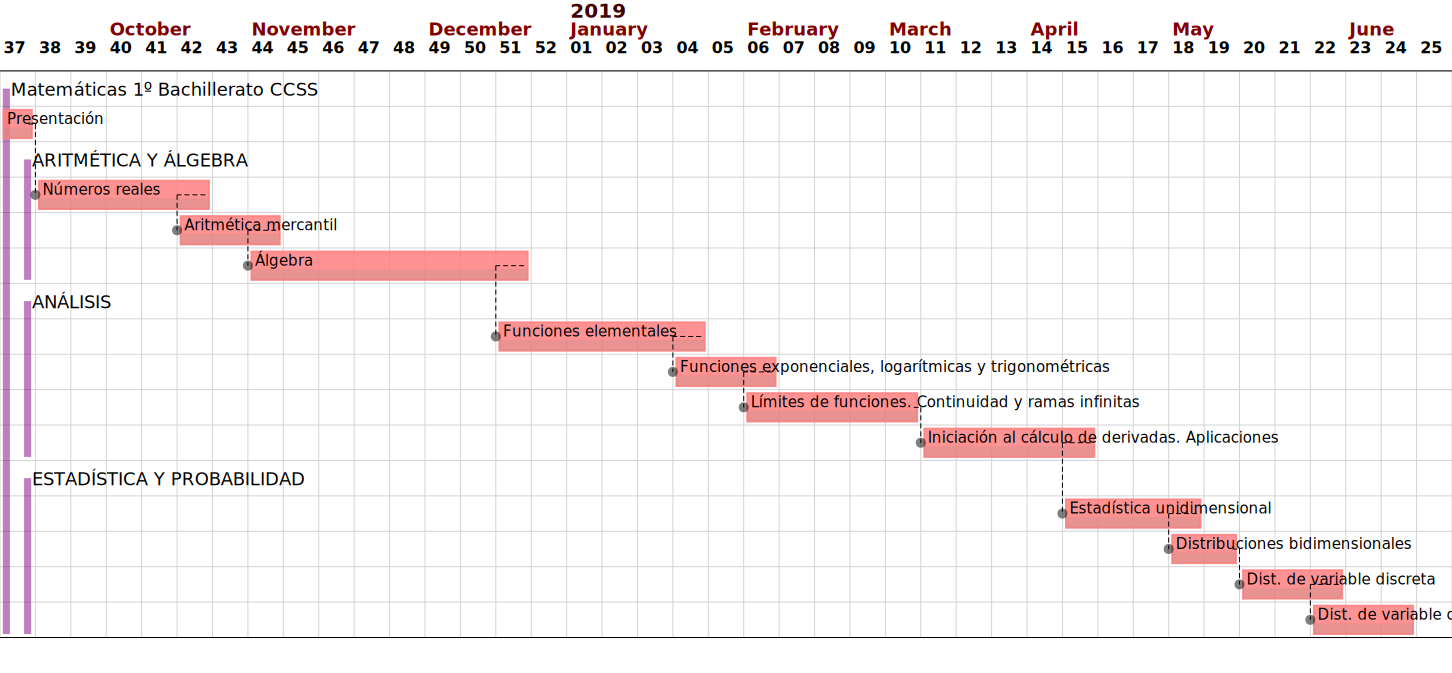

In [6]:
import pandas as pd
import datetime
from datetime import timedelta, date
import gantt

# https://www.enmimaquinafunciona.com/pregunta/42290/convertir-de-svg-a-pdf-en-varias-hojas
# El siguiente comando divide el svg en 2x4 celdas:
# convert prueba.svg -crop 25%x50% +repage pruebasplit.pdf 


# prog = pd.read_csv('prog_1bac_cn.csv')

# Hay que modificar el documento para que cualquiera con el enlace lo pueda ver

#sheet_url = 'https://docs.google.com/spreadsheets/d/12TL9nMPoz0cOf2OzeHv8AWwT-3sfWWeeTttO-KSYsNI/edit#gid=0'
sheet_url = 'https://docs.google.com/spreadsheets/d/15kpQ0uAfdrcyM2RFn9Rr3ZxDzgFJJjXMy2o7oED_Cl4/edit#gid=0'
#sheet_url = 'https://docs.google.com/spreadsheets/d/1QGOnfK9wv-CaymZh0buFUeeSL41BxacDxB2A6MbNSR8/edit#gid=0'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(csv_export_url)
prog = pd.read_csv(csv_export_url, error_bad_lines=False)

#Encabezados

c1, c2, c3 = prog.columns[0], prog.columns[1], prog.columns[2]

# nombre_proyecto = 'Matemáticas 1º Bachillerato'
nombre_proyecto = 'Matemáticas 1º Bachillerato CCSS'

gantt.define_font_attributes(fill='black', stroke='black', stroke_width=0.001,  font_family="Arial Bold")

#gantt
hoy = datetime.date.today()
inicio = datetime.date(2018, 9, 13)
detalle = False

# Fiestas Pilar
inicio_vacas = date(2018, 10, 11) + timedelta(days=0)  # start date
vacaciones = 2  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

# Puentes
inicio_vacas = date(2018, 11, 1) + timedelta(days=0)  # start date
vacaciones = 2  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

inicio_vacas = date(2018, 12, 6) + timedelta(days=0)  # start date
vacaciones = 2  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

# Navidad
inicio_vacas = date(2018, 12, 22) + timedelta(days=0)  # start date
vacaciones = 17  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))
    
# Semana Santa
inicio_vacas = date(2019, 4, 15) + timedelta(days=0)  # start date
vacaciones = 9  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))
    
# Dia de la semana no lectivo

primer_dia = date(2018, 9, 14) + timedelta(days=0)  # start date
semanas = 38
for i in range(semanas):
    gantt.add_vacations(primer_dia + timedelta(days=i * 7))

# Creación del proyecto y la tarea presentación

p  = gantt.Project(name = nombre_proyecto, color='#FFFF40')

if not(detalle):
    t2_anterior = gantt.Task(name='Presentación',start = inicio, duration=1, color="#FF8080")
    p.add_task(t2_anterior)
else:
    t2_anterior = gantt.Project(name='Presentación', color='#FFFF40')
    t3_anterior = gantt.Task(name='Presentación',start = inicio, duration=1, color="#FF8080")
    p.add_task(t3_anterior)



    
for n1 in prog.groupby(c1, sort = False).count().index: 
    #print('\n\n','BLOQUE TEMÁTICO:', n1)
    t1  = gantt.Project(name = n1, color='#FFFF40')
    for n2 in prog[prog[c1] == n1].groupby(c2, sort = False).count().index: 
    #   print('\n\n','Unidad:', n2, '\n')
        if not(detalle) :
            t2_actual = gantt.Task(name=n2,depends_of=t2_anterior, duration= prog[prog[c2] == n2].sum()['Duracion'], color="#FF8080", display=not(detalle))
            t1.add_task(t2_actual)
            t2_anterior = t2_actual
        else :
            t2  = gantt.Project(name = n2, color='#FFFF40')
            for n3 in prog[prog[c2] == n2].groupby(c3, sort = False).count().index: 
     #          print(n3, prog[prog[c3] == n3].sum()['Duracion'], end='/ ')
                t3_actual = gantt.Task(name=n3,depends_of=t3_anterior, duration= prog[prog[c3] == n3].sum()['Duracion'], color="#FF8080", display=detalle)
                t2.add_task(t3_actual)
                t3_anterior = t3_actual
            t1.add_task(t2)
    p.add_task(t1)  
    
# Fichero de salida    
    
if not(detalle) :    
    p.make_svg_for_tasks(filename='prueba.svg', scale=gantt.DRAW_WITH_WEEKLY_SCALE, title_align_on_left=False)
else :
    p.make_svg_for_tasks(filename='prueba.svg', scale=gantt.DRAW_WITH_DAILY_SCALE, title_align_on_left=False)


# Muestra en consola

from IPython.core.display import SVG
SVG(filename='prueba.svg')
            
            


In [0]:
import pandas as pd
prog = pd.read_csv('prog_1bac_cn.csv')
#for grupo in list(prog.groupby('Bloque').first().index): print(grupo)

#c1 = 'Bloque'    
#c2 = 'Unidad'    
#c3 = 'Contenido'   
c1 = prog.columns[0]
c2 = prog.columns[1]
c3 = prog.columns[2]


for n1 in prog.groupby(c1, sort = False).count().index: 
    print('\n\n','BLOQUE TEMÁTICO:', n1)
    for n2 in prog[prog[c1] == n1].groupby(c2, sort = False).count().index: 
        print('\n\n','Unidad:', n2, '\n')
        for n3 in prog[prog[c2] == n2].groupby(c3, sort = False).count().index: 
            print(n3, end='/ ')




 BLOQUE TEMÁTICO: Aritmética y álgebra


 Unidad: Números reales 

Diferentes tipos de números reales./ Representación en la recta real. Distancia entre dos números reales: valor absoluto./ Subconjuntos de números reales: intervalos./ Operaciones con números reales: radicales (propiedades), potencias de exponente racional…/ Aproximaciones de números reales. Error./ Utilización de la calculadora y el ordenador como herramientas que facilitan el cálculo y en la elección del mejor método de resolución de los problemas numéricos./ Definición y propiedades del logaritmo./ 

 Unidad: Sucesiones 

Concepto de sucesión./ Criterio de formación de una sucesión. Sucesiones recurrentes./ Término general y suma de las progresiones aritméticas y geométricas./ Monotonía y acotación./ El número e.. Idea intuitiva del concepto de límite. Cálculo del límite para términos avanzados con ayuda de la calculadora./ 

 Unidad: Inecuaciones y sistemas 

Resolución de inecuaciones con una incógnita:/ Resoluci

In [0]:
gantt.FONT_ATTR?